In [24]:
# 라이브러리 추가
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.5)
import matplotlib.pyplot as plt

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/KoPubDotumBold.ttf").get_name()
rc('font', family=font_name, size=20)

In [25]:
# 구글 트렌드 API: pytrends
from pytrends.request import TrendReq
pytrends = TrendReq(hl='ko', tz=540)

In [26]:
# '국립공원', 국립공원관리공단', '국립공원공단' 검색빈도
kw_list = ["국립공원", "국립공원관리공단", "국립공원공단"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='KR', gprop='')
df = pytrends.interest_over_time()
del df['isPartial']
df.to_excel('D:/GEODATA/pytrends.xlsx')

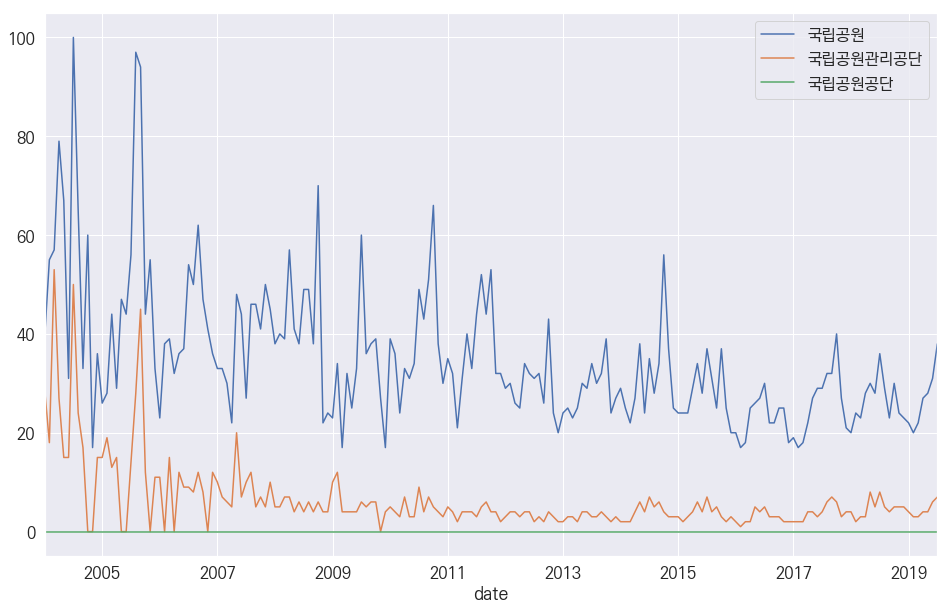

In [27]:
# '국립공원', 국립공원관리공단', '국립공원공단' 라인 플롯
df = pd.read_excel('D:/GEODATA/pytrends.xlsx', sheet_name='Sheet1' ,index_col='date', parse_dates=True)
df.plot(figsize=(16, 10))
plt.savefig('D:/GEODATA/PYTRENDS1_IMG01.png', bbox_inches='tight')

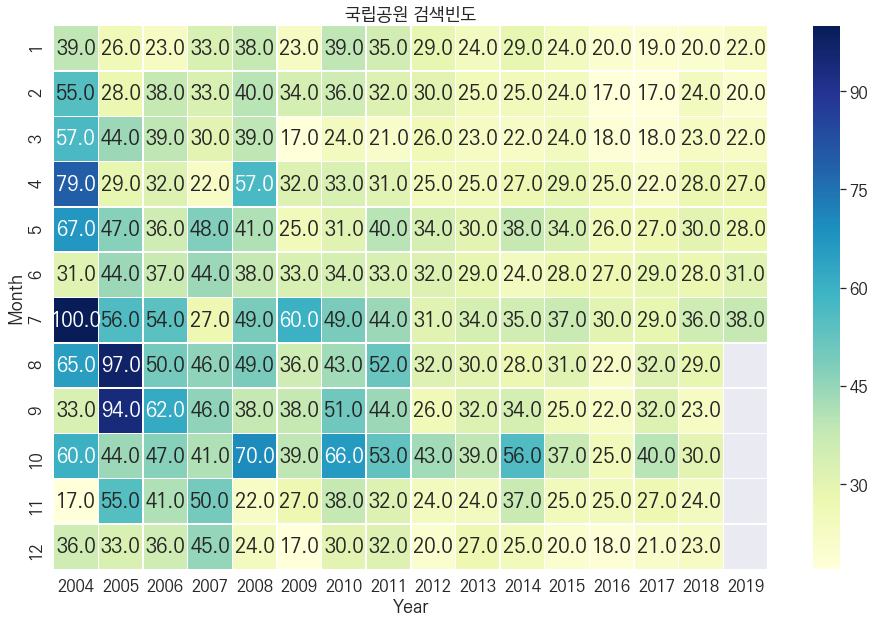

In [28]:
# '국립공원' 열지도
df['Year'] = df.index.year; df['Month'] = df.index.month
df1 = df.pivot("Month", "Year", "국립공원")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df1, cmap="YlGnBu", annot=True, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('국립공원 검색빈도')
plt.savefig('D:/GEODATA/PYTRENDS1_IMG02.png', bbox_inches='tight')

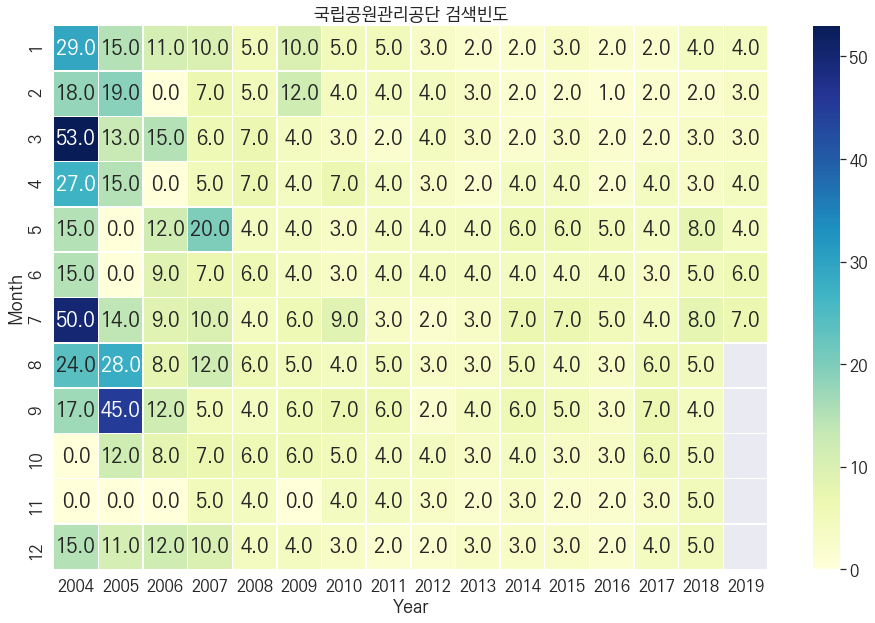

In [29]:
# '국립공원관리공단' 열지도
df2 = df.pivot("Month", "Year", "국립공원관리공단")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df2, cmap="YlGnBu", annot=True, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('국립공원관리공단 검색빈도')
plt.savefig('D:/GEODATA/PYTRENDS1_IMG03.png', bbox_inches='tight')

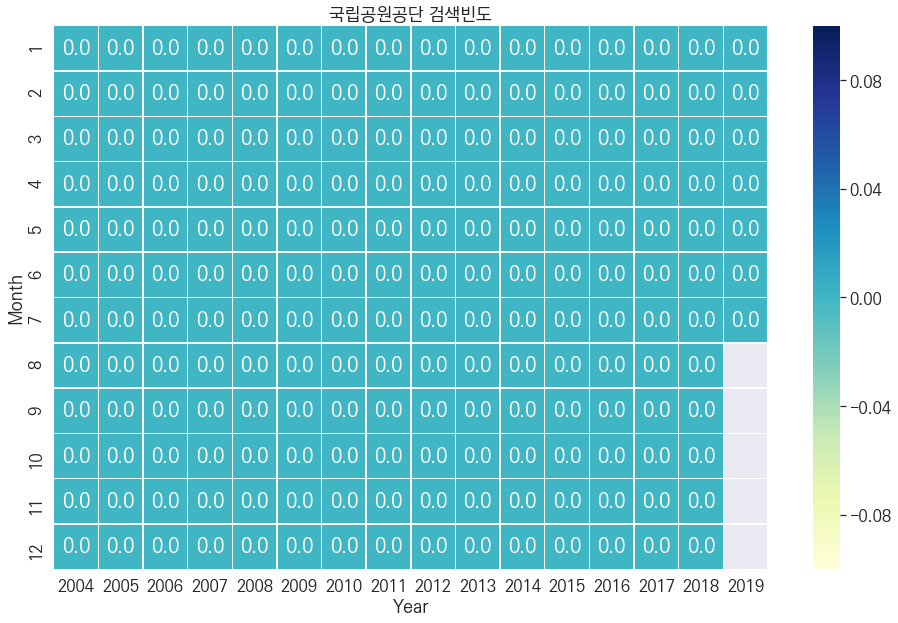

In [30]:
# '국립공원공단' 열지도
df['Year'] = df.index.year; df['Month'] = df.index.month
df3 = df.pivot("Month", "Year", "국립공원공단")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df3, cmap="YlGnBu", annot=True, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('국립공원공단 검색빈도')
plt.savefig('D:/GEODATA/PYTRENDS1_IMG04.png', bbox_inches='tight')

Text(0, 0.5, '검색빈도')

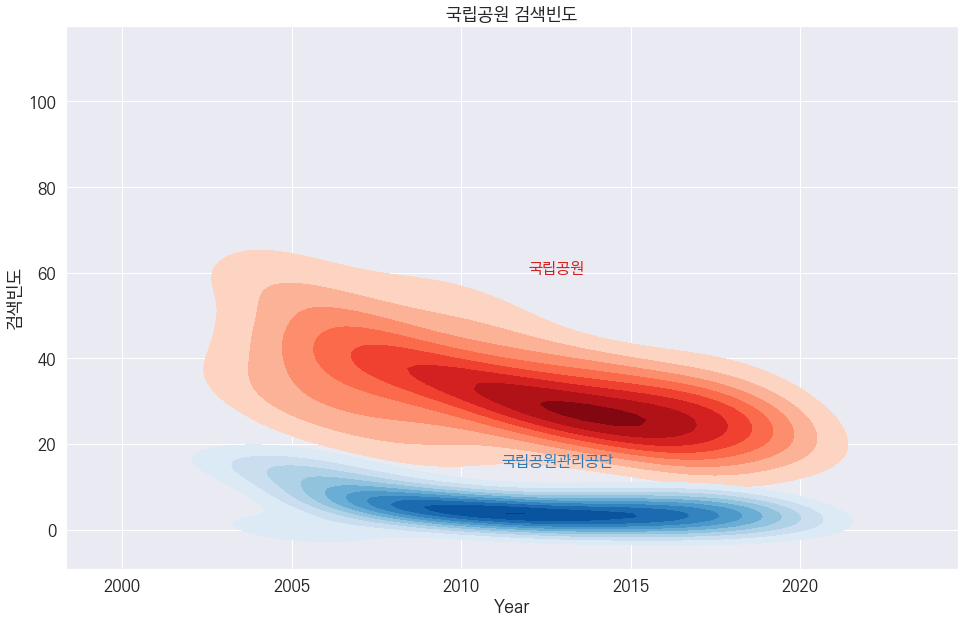

In [31]:
# '국립공원', '국립공원관리공단' KDE 플롯
# Draw the two density plots
f, ax = plt.subplots(figsize=(16, 10))
sns.kdeplot(df['Year'], df['국립공원'], cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(df['Year'], df['국립공원관리공단'], cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2012, 60, "국립공원", size=16, color=red)
ax.text(2011.2, 15, "국립공원관리공단", size=16, color=blue)
ax.set_title('국립공원 검색빈도')
plt.ylabel('검색빈도')

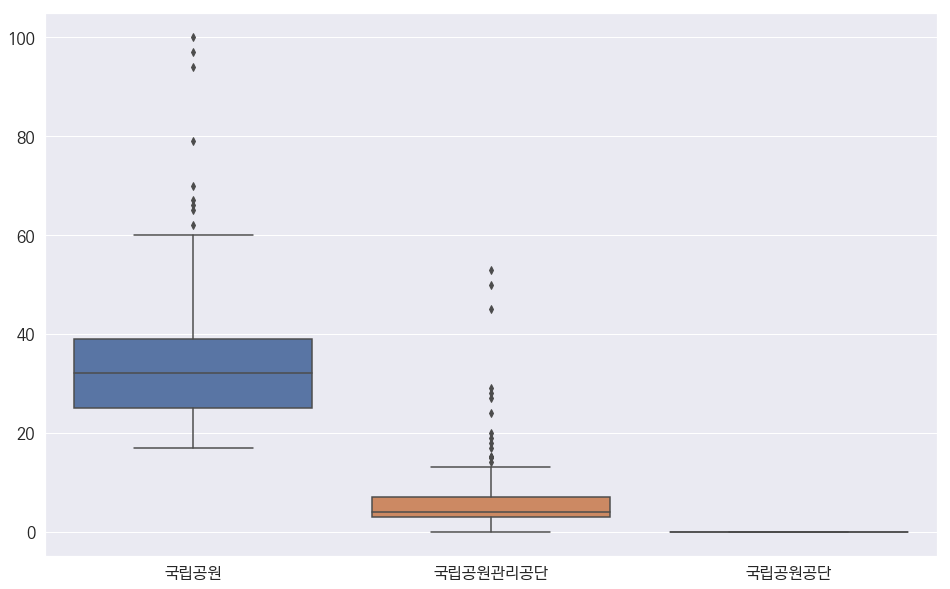

In [32]:
# '국립공원', '국립공원관리공단', '국립공원공단' 박스 플롯
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[['국립공원', '국립공원관리공단', '국립공원공단']])

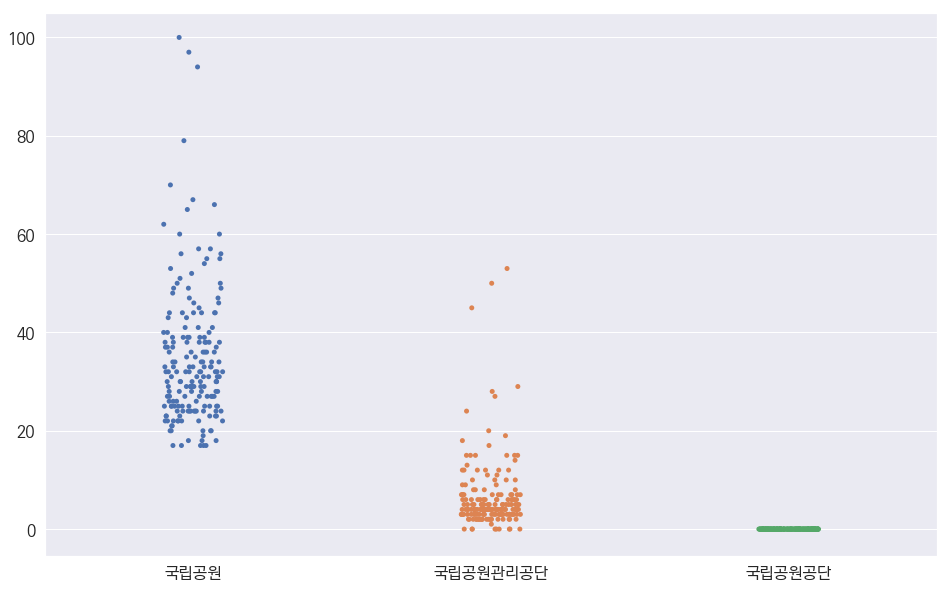

In [33]:
# '국립공원', '국립공원관리공단', '국립공원공단' 닷 플롯
plt.figure(figsize=(16, 10))
sns.stripplot(data=df[['국립공원', '국립공원관리공단', '국립공원공단']])

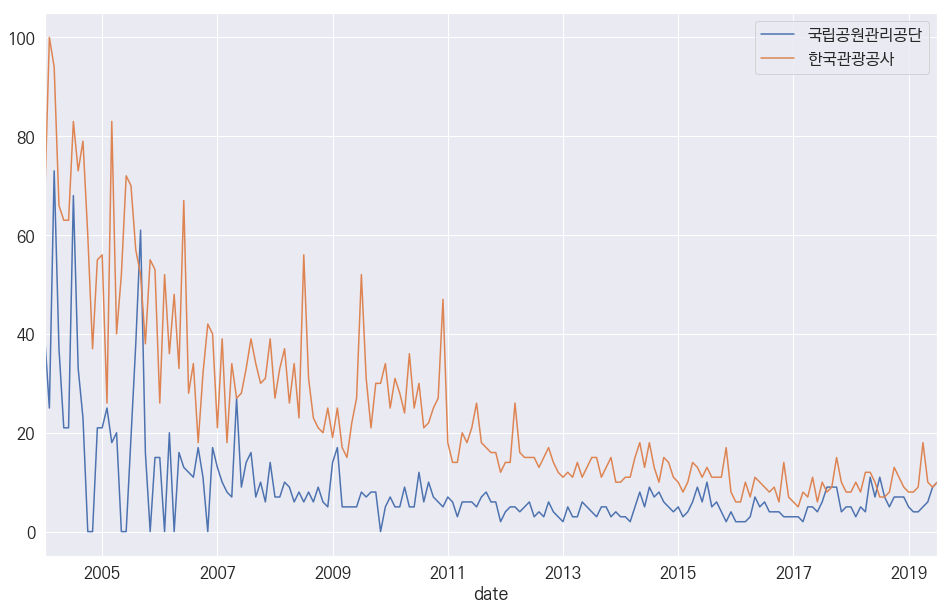

In [34]:
# '국립공원관리공단', '한국관광공사' 검색 빈도
kw_list = ["국립공원관리공단", "한국관광공사"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='KR', gprop='')
df = pytrends.interest_over_time()
del df['isPartial']

# 라인 플롯
df.plot(figsize=(16, 10))

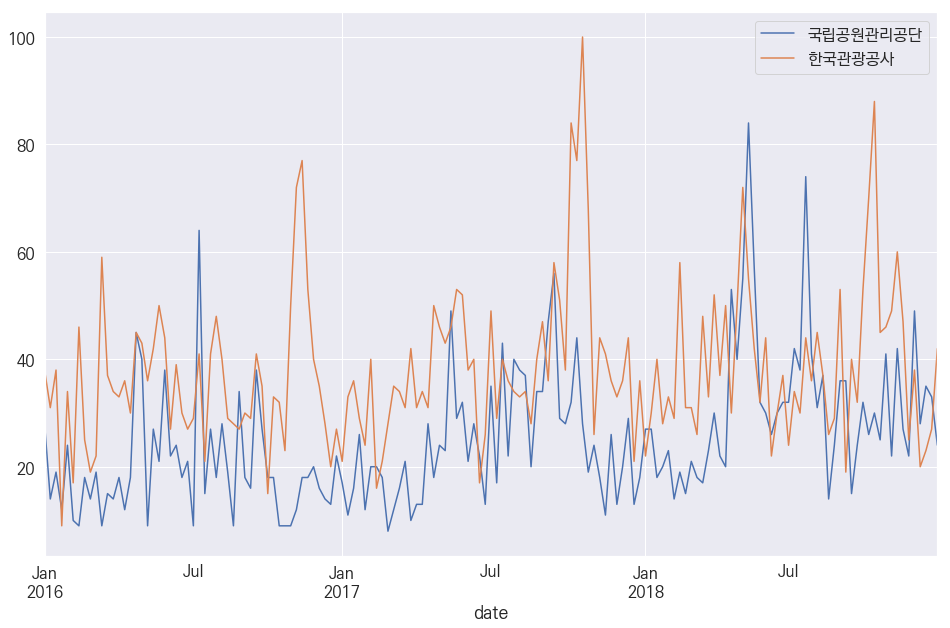

In [35]:
# '국립공원관리공단', '한국관광공사' 라인 플롯
kw_list = ["국립공원관리공단", "한국관광공사"]
pytrends.build_payload(kw_list, cat=0, timeframe='2016-01-01 2018-12-31', geo='KR', gprop='')
df = pytrends.interest_over_time()
del df['isPartial']

# 라인 플롯
df.plot(figsize=(16, 10))

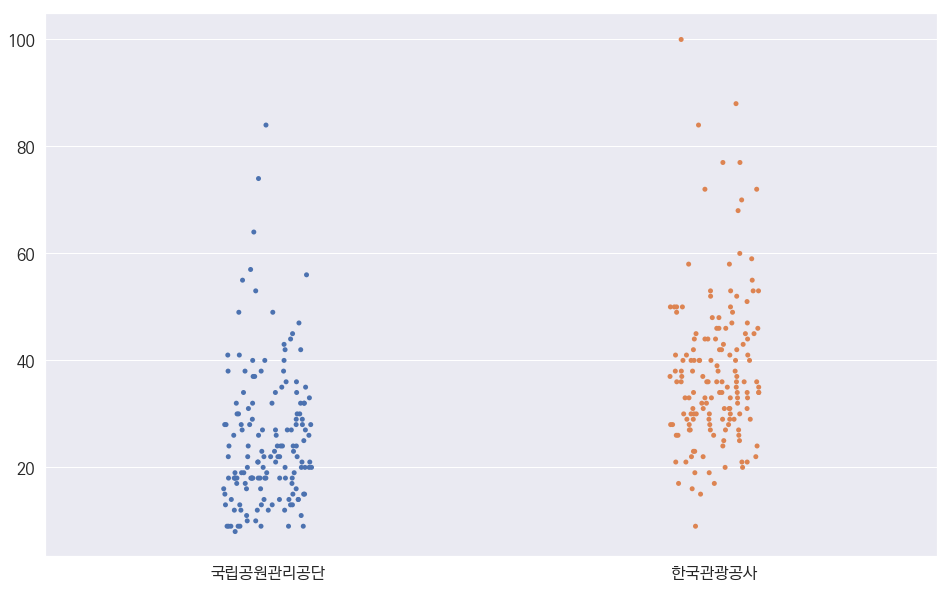

In [36]:
# '국립공원관리공단', '한국관광공사' 닷 플롯
plt.figure(figsize=(16, 10))
sns.stripplot(data=df[['국립공원관리공단', '한국관광공사']])

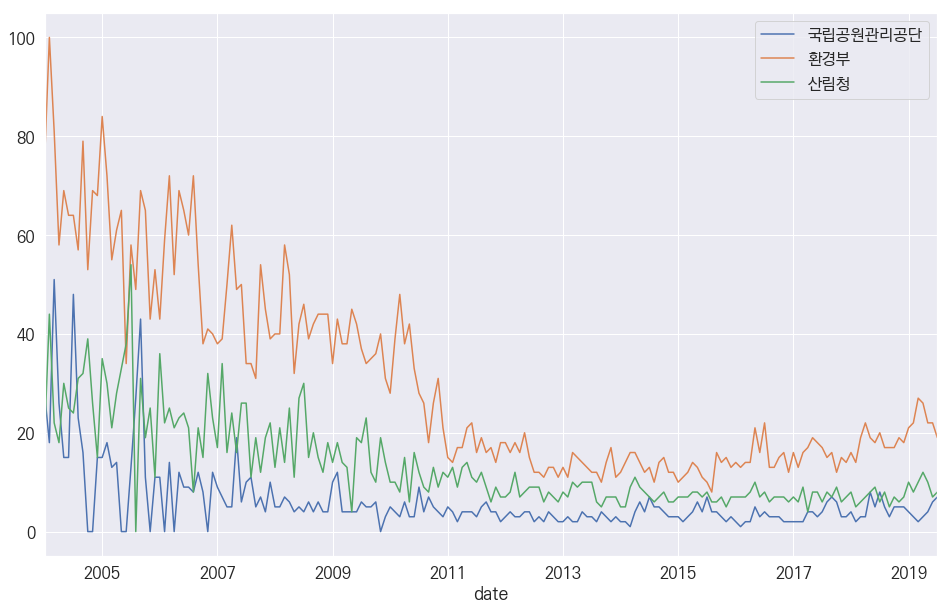

In [37]:
# '국립공원관리공단', '환경부', '산림청' 검색 빈도
kw_list = ["국립공원관리공단", "환경부", "산림청"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='KR', gprop='')
df = pytrends.interest_over_time()
del df['isPartial']

# 라인 플롯
df.plot(figsize=(16, 10))

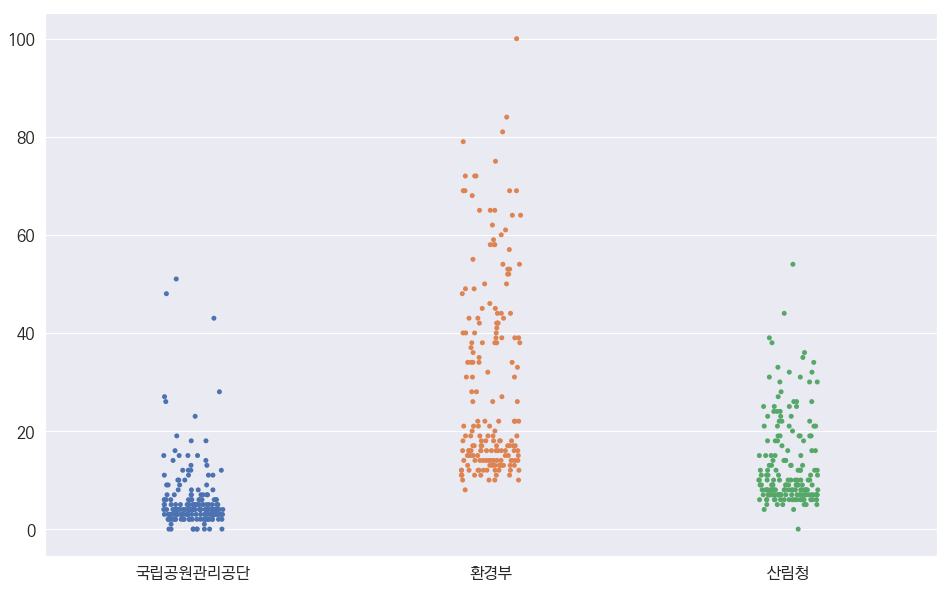

In [38]:
# '국립공원관리공단', '환경부', '산림청' 닷 플롯
plt.figure(figsize=(16, 10))
sns.stripplot(data=df[['국립공원관리공단', '환경부', '산림청']])

Text(0, 0.5, '검색빈도')

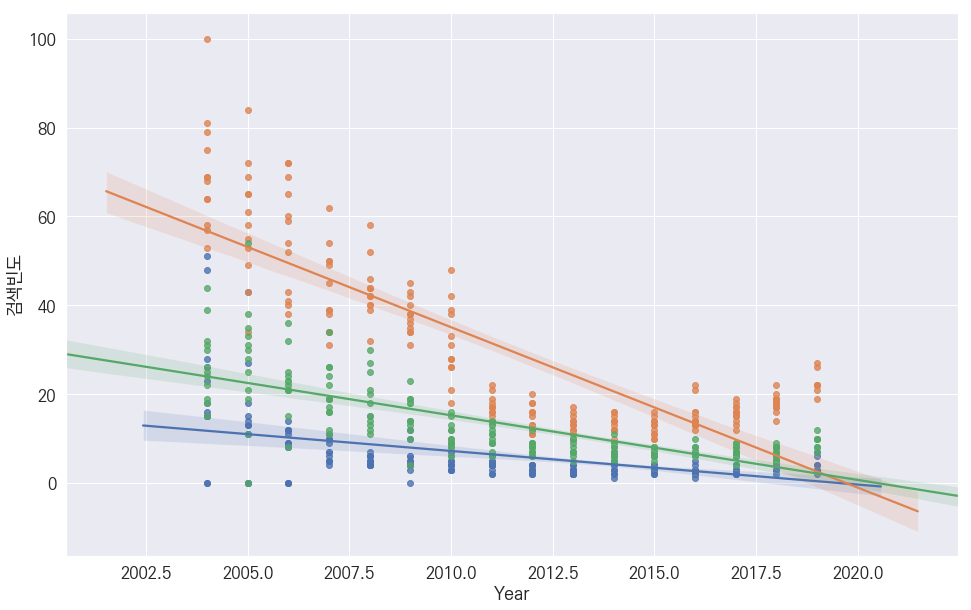

In [39]:
# '국립공원관리공단', '환경부', '산림청' 회귀 플롯
plt.figure(figsize=(16, 10))
df['Year'] = df.index.year; df['Month'] = df.index.month
sns.regplot(x=df['Year'], y=df['국립공원관리공단'], data=df)
sns.regplot(x=df['Year'], y=df['환경부'], data=df)
sns.regplot(x=df['Year'], y=df['산림청'], data=df)
plt.ylabel('검색빈도')

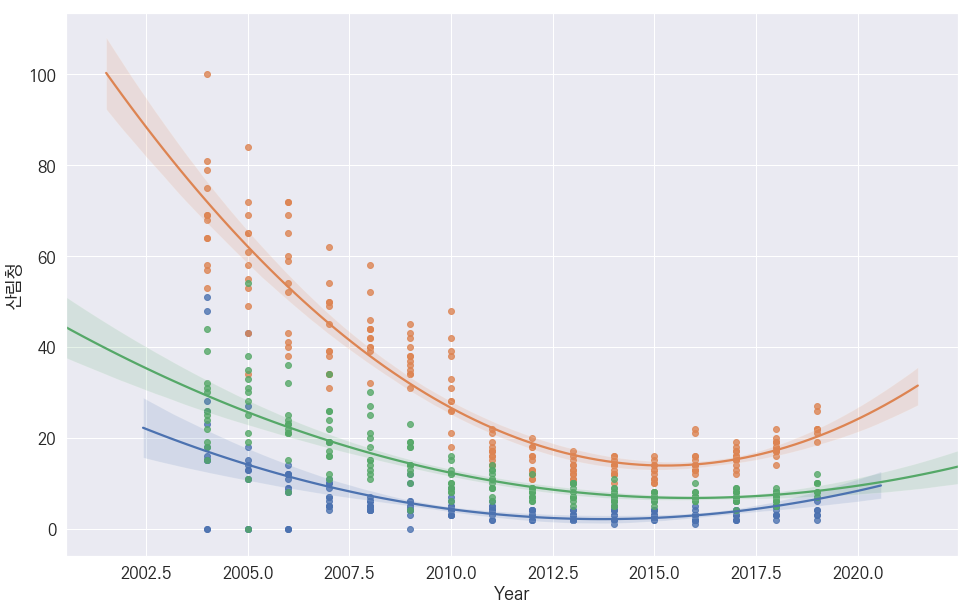

In [40]:
# '국립공원관리공단', '환경부', '산림청' 회귀 2차 플롯
plt.figure(figsize=(16, 10))
df['Year'] = df.index.year; df['Month'] = df.index.month
sns.regplot(x=df['Year'], y=df['국립공원관리공단'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['환경부'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['산림청'], data=df, order=2)

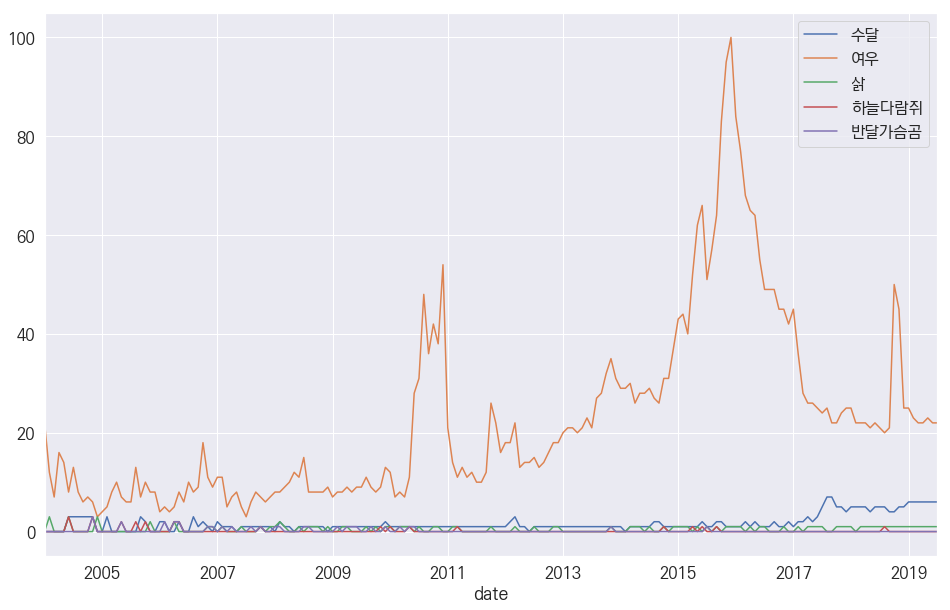

In [41]:
# '수달', '여우', '삵', '하늘다람쥐', '반달가슴곰' 라인 플롯
kw_list = ["수달", "여우", "삵", "하늘다람쥐", "반달가슴곰"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='KR', gprop='')
df = pytrends.interest_over_time()
del df['isPartial']

# 라인 플롯
df.plot(figsize=(16, 10))

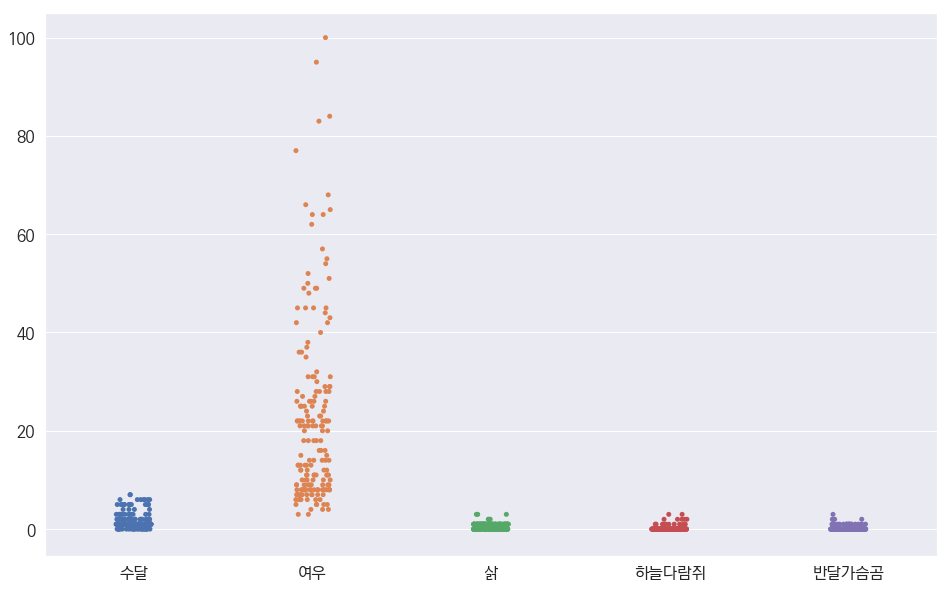

In [42]:
# '수달', '여우', '삵', '하늘다람쥐', '반달가슴곰' 닷 플롯
plt.figure(figsize=(16, 10))
sns.stripplot(data=df[['수달', '여우', '삵', '하늘다람쥐', '반달가슴곰']])

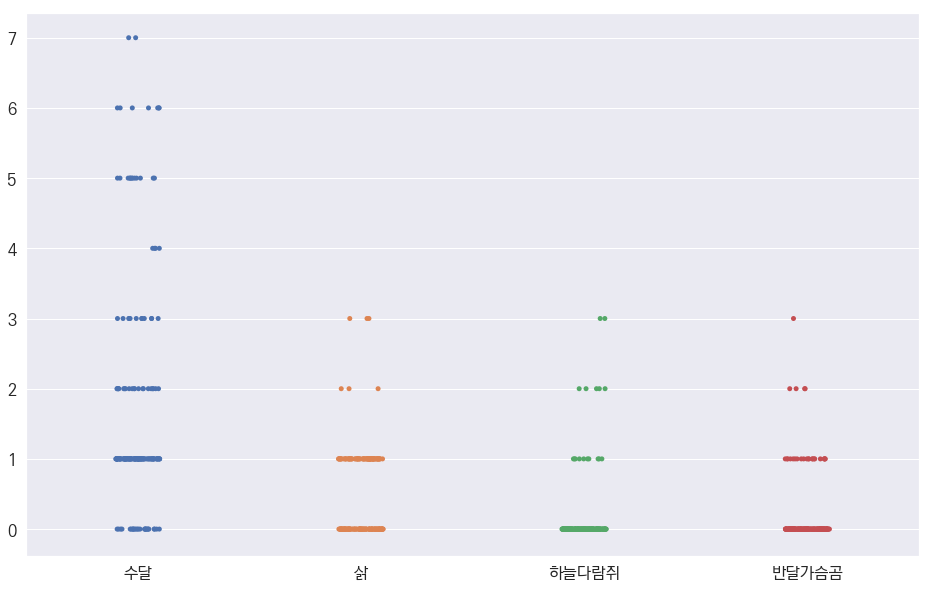

In [43]:
# '수달', '삵', '하늘다람쥐', '반달가슴곰' 닷 플롯
plt.figure(figsize=(16, 10))
sns.stripplot(data=df[['수달', '삵', '하늘다람쥐', '반달가슴곰']])

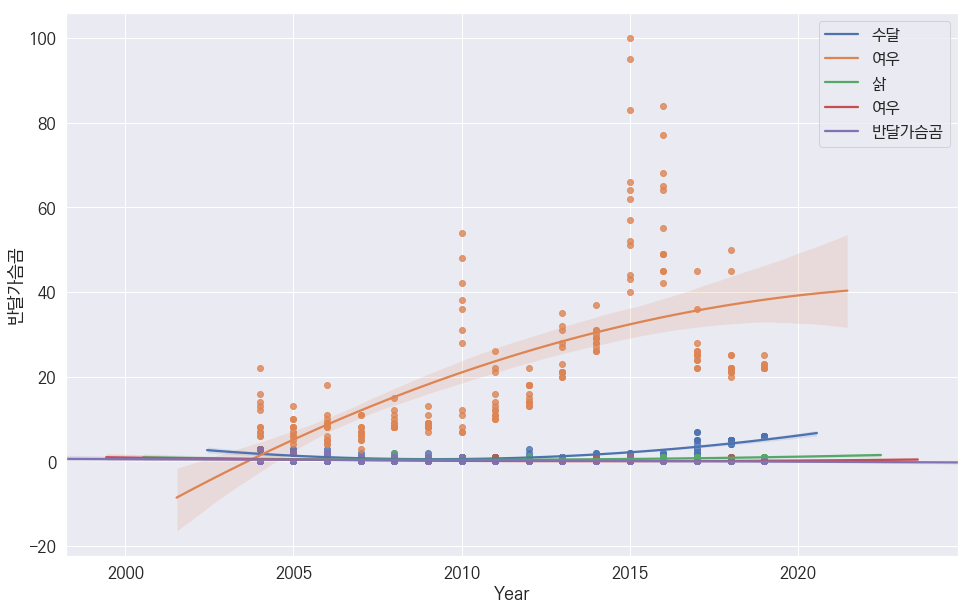

In [44]:
# '수달', '여우', '삵', '하늘다람쥐', '반달가슴곰' 회귀 2차 플롯
plt.figure(figsize=(16, 10))
df['Year'] = df.index.year; df['Month'] = df.index.month
sns.regplot(x=df['Year'], y=df['수달'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['여우'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['삵'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['하늘다람쥐'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['반달가슴곰'], data=df, order=2)
plt.legend(labels=['수달', '여우', '삵', '여우', '반달가슴곰'])

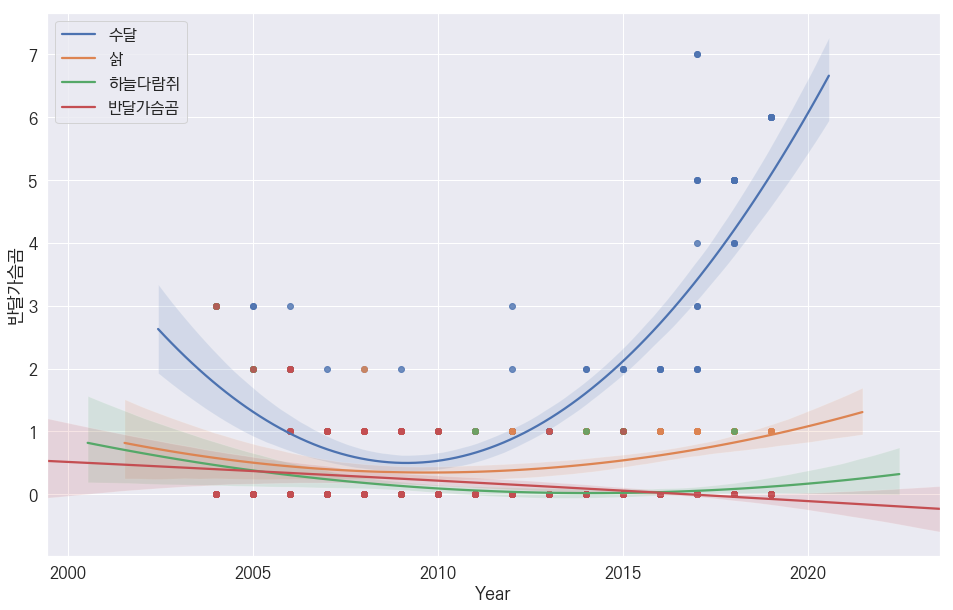

In [45]:
# '수달', '삵', '하늘다람쥐', '반달가슴곰' 회귀 2차 플롯
plt.figure(figsize=(16, 10))
df['Year'] = df.index.year; df['Month'] = df.index.month
sns.regplot(x=df['Year'], y=df['수달'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['삵'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['하늘다람쥐'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['반달가슴곰'], data=df, order=2)
plt.legend(labels=['수달', '삵', '하늘다람쥐', '반달가슴곰'])

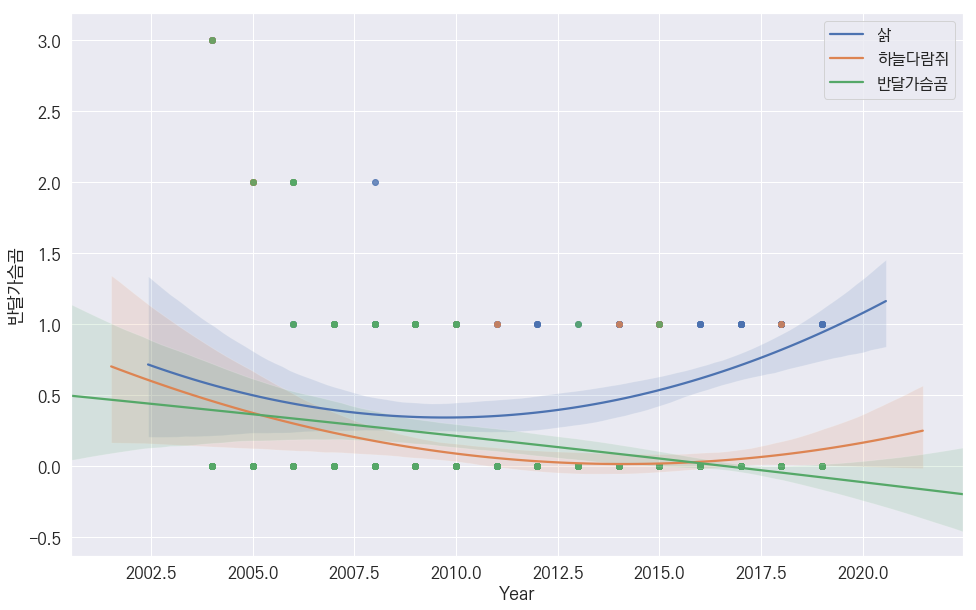

In [46]:
# '삵', '하늘다람쥐', '반달가슴곰' 회귀 2차 플롯
plt.figure(figsize=(16, 10))
df['Year'] = df.index.year; df['Month'] = df.index.month
sns.regplot(x=df['Year'], y=df['삵'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['하늘다람쥐'], data=df, order=2)
sns.regplot(x=df['Year'], y=df['반달가슴곰'], data=df, order=2)
plt.legend(labels=['삵', '하늘다람쥐', '반달가슴곰'])